# Scaling(Olcekleme)

## Noronlarimiza verilerimizi vermeden once parcalama islemini yapalim;

### Not: Bisiklet veri setimizde ki tum degerler gelisi guzel verilmistir.

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('bisiklet_fiyatlari.xlsx')

In [3]:
df

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [4]:
import matplotlib.pyplot as plt
import seaborn as sbs

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = df['Fiyat'].values

In [7]:
y

array([ 807.6738764,  959.2275201,  718.0200329,  945.6688847,
        955.5429676,  950.2214253,  972.0999123,  730.7470179,
        653.0064296, 1108.363012 , 1092.432411 ,  831.9017301,
       1050.644778 ,  932.4576656,  827.4618849,  886.0465092,
        889.7252105, 1068.296866 ,  566.4010835,  780.8715318,
        633.7147302,  758.4686205,  983.5045088, 1115.291836 ,
        914.9140132,  822.1549425,  950.4423736,  989.5097974,
        927.5574942, 1068.515289 ,  844.4737208,  573.2300709,
       1014.528968 ,  784.7521757, 1100.709911 ,  939.3954013,
        997.617767 ,  626.1947566, 1071.148623 ,  778.1894898,
       1050.207614 ,  916.1829736,  897.6624037, 1076.042305 ,
        707.6178069, 1126.454907 ,  855.674057 ,  775.6082   ,
        900.3383662,  901.043046 ,  568.8524138,  970.6586024,
        789.93495  , 1028.438035 ,  836.0406201, 1005.402312 ,
        960.5938984,  925.2090462,  775.6192584,  696.2936631,
        622.6418664,  806.2158674,  935.842904 ,  940.8

In [8]:
X = df[['BisikletOzellik1', 'BisikletOzellik2']].values

In [9]:
X

array([[1749.628226, 1749.590668],
       [1748.007826, 1751.824206],
       [1750.122967, 1747.977026],
       ...,
       [1752.540381, 1747.98331 ],
       [1751.34929 , 1747.484989],
       [1748.656426, 1752.539962]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

## Scaling islemi;

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [17]:
X_test

array([[ 0.56706914,  0.70743354],
       [ 0.45694459,  0.23213923],
       [ 0.54990366,  0.48049092],
       [ 0.2940838 ,  0.62874574],
       [ 0.25255028,  0.65552399],
       [-0.01410839,  0.26503552],
       [ 0.47207615,  0.58340399],
       [ 0.44645595,  0.66652423],
       [ 0.71271197,  0.47558898],
       [ 0.52327593,  0.65795133],
       [ 0.51589828,  0.35124843],
       [ 0.68132069,  0.46394647],
       [ 0.34838222,  0.66396795],
       [ 0.59835704,  0.66492102],
       [ 0.7743903 ,  0.65539702],
       [ 0.36366154,  0.34590211],
       [ 0.38364758,  0.85598251],
       [ 0.15783877,  0.41240613],
       [ 0.3581219 ,  0.90091814],
       [ 0.54142039,  0.49688287],
       [ 0.49003412,  0.52974122],
       [ 0.61542611,  0.26192082],
       [ 0.5697328 , -0.01882354],
       [ 0.15993374,  0.36593875],
       [ 0.58693437,  0.41410011],
       [ 0.66459019,  0.6746364 ],
       [ 0.37258234,  0.37907714],
       [ 0.37582535,  0.4277929 ],
       [ 0.36091834,

## Verilerimizi 0-1 araligina cektik

# Verilerimizi modelimize verelim;

In [19]:
import tensorflow as tf

### tensorflow2 ile birlikte keras tensorflow'un icinde gelmektedir!

### Modelimizi Sequential'dan olusturuyoruz. Icerisinde hangi layer'larla calisacagimizi belirtiyoruz.

In [20]:
from tensorflow.keras.models import Sequential # modelimizi seciyoruz
from tensorflow.keras.layers import Dense # katmanimizi seciyoruz

In [21]:
model = Sequential() # modelimizi olusturduk

### ReLU -> Artifical Neural Networks baglaminda dogrultucu veya ReLU aktivasyon fonk.;
### argumanin poz. kismi olarak tanimlanan bir aktivasyon fonksiyonudur.

In [22]:
# Toplam 3 adet Hidden Layer olusturduk
model.add(Dense(4,activation='relu')) # modelimize noronlarimizi ekliyoruz
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Output, Cikti Layerimiz
model.add(Dense(1)) # Genelde 1 veririz cok karmasik islemlerde 1'den fazla output'a ihtiyac duyabiliriz!

## Kullanacagimiz Optimizasyon Algoritmamizi ekleyelim;
### ADAM(en cok kullanilir ve iyi sonuclar verir), RMSProp bunlardan 2'si

#### mse = mean squared error(ortalama hata karesi); tahmin edilen degerler ile gercek deger arasindaki ortalama karesi alinmis farki olcer    MSE = karesi alinmis hata kaybinin beklenen degerine karsilik gelen bir risk fonsiyonudur.

In [23]:
model.compile(optimizer='rmsprop', loss='mse')

## Modelin Egitilmesi;

epochs = Veri Seti uzerinde ne kadar gezilecek onu belirtiyoruz.  
Butun veri seti icinde 1 defa gezildiginde 1 epochs olur.  
Epochs degeri cok fazla olursa overfitting(gercek amacindan cikip sadece kendi veri setindeki degerler gercek ciksin diye noronlar ogrenmeye baslayabilir/asiri uyum gosterme) olabilir!

In [24]:
model.fit(X_train, y_train, epochs=250) # X_train verisini y_train ile egitiyoruz ve 250 defa Veri Setinde gezin

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 795829.1875
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795715.7500
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 795595.3750
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 795455.2500
Epoch 5/250
21/21 [==============================] - 0s 997us/step - loss: 795286.6250
Epoch 6/250
21/21 [==============================] - 0s 974us/step - loss: 795080.6250
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 794834.1875
Epoch 8/250
21/21 [==============================] - 0s 953us/step - loss: 794540.3125
Epoch 9/250
21/21 [==============================] - 0s 987us/step - loss: 794193.1875
Epoch 10/250
21/21 [==============================] - 0s 910us/step - loss: 793789.8125
Epoch 11/250
21/21 [==============================] - 0s 918us/step - loss: 793324.1250
Epoch 12/250
21/21 [==============================]

21/21 [==============================] - 0s 947us/step - loss: 17860.4785
Epoch 95/250
21/21 [==============================] - 0s 928us/step - loss: 12848.9209
Epoch 96/250
21/21 [==============================] - 0s 880us/step - loss: 9399.4824
Epoch 97/250
21/21 [==============================] - 0s 880us/step - loss: 7323.1270
Epoch 98/250
21/21 [==============================] - 0s 847us/step - loss: 6440.0879
Epoch 99/250
21/21 [==============================] - 0s 846us/step - loss: 6185.1240
Epoch 100/250
21/21 [==============================] - 0s 819us/step - loss: 6112.7178
Epoch 101/250
21/21 [==============================] - 0s 788us/step - loss: 6018.9355
Epoch 102/250
21/21 [==============================] - 0s 863us/step - loss: 5918.8076
Epoch 103/250
21/21 [==============================] - 0s 861us/step - loss: 5827.3184
Epoch 104/250
21/21 [==============================] - 0s 836us/step - loss: 5719.2271
Epoch 105/250
21/21 [==============================] - 0s 87

21/21 [==============================] - 0s 883us/step - loss: 315.9449
Epoch 189/250
21/21 [==============================] - 0s 894us/step - loss: 298.9946
Epoch 190/250
21/21 [==============================] - 0s 908us/step - loss: 279.1715
Epoch 191/250
21/21 [==============================] - 0s 835us/step - loss: 262.3538
Epoch 192/250
21/21 [==============================] - 0s 852us/step - loss: 247.9229
Epoch 193/250
21/21 [==============================] - 0s 848us/step - loss: 231.6904
Epoch 194/250
21/21 [==============================] - 0s 865us/step - loss: 218.5082
Epoch 195/250
21/21 [==============================] - 0s 855us/step - loss: 202.9559
Epoch 196/250
21/21 [==============================] - 0s 797us/step - loss: 191.6735
Epoch 197/250
21/21 [==============================] - 0s 826us/step - loss: 179.5566
Epoch 198/250
21/21 [==============================] - 0s 873us/step - loss: 169.0336
Epoch 199/250
21/21 [==============================] - 0s 874us/step

### Kayip olan verileri grafige dokelim

In [25]:
loss = model.history.history['loss']

<AxesSubplot:>

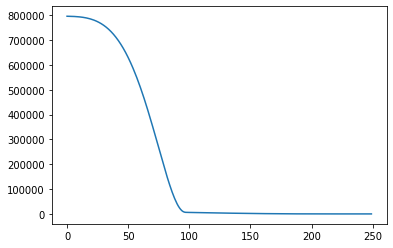

In [26]:
sbs.lineplot(x=range(len(loss)), y=loss)

In [27]:
trainLoss = model.evaluate(X_train, y_train, verbose=0)

In [28]:
testLoss = model.evaluate(X_test, y_test, verbose=1)

11/11 [==============================] - 0s 782us/step - loss: 78.6464


### Loss degerleri ne kadar dusuk olursa o kadar iyi olur ancak bizim burdaki amacimiz;
### trainLoss ile testLoss degerlerinin birbirlerine yakin mi degil mi anlamak? Yakin olmasi iyi!

In [29]:
trainLoss

73.42591857910156

In [30]:
testLoss

78.64636993408203

### test verilerimizle egittimiz model ne kadar dogru calisiyor?

In [31]:
testPredict = model.predict(X_test) # X_test'te features var features verip output almaliyiz

11/11 [==============================] - 0s 798us/step


### Bisikletlerin ozelliklerine gore su fiyattan satilabilir ongorusunu bize getirdi

In [32]:
testPredict

array([[1077.0237 ],
       [ 623.3845 ],
       [ 875.4723 ],
       [ 893.65625],
       [ 898.92676],
       [ 451.35532],
       [ 930.4879 ],
       [ 990.7484 ],
       [ 940.4663 ],
       [1016.0571 ],
       [ 750.39276],
       [ 917.16003],
       [ 946.8811 ],
       [1053.9309 ],
       [1120.5889 ],
       [ 681.119  ],
       [1126.2273 ],
       [ 650.5743 ],
       [1153.843  ],
       [ 885.8981 ],
       [ 892.1859 ],
       [ 716.228  ],
       [ 456.49997],
       [ 611.68994],
       [ 834.38086],
       [1090.3947 ],
       [ 713.30707],
       [ 756.38464],
       [ 872.89777],
       [ 770.1035 ],
       [ 451.02786],
       [ 782.4783 ],
       [ 727.7892 ],
       [ 646.40686],
       [ 886.11993],
       [ 843.2185 ],
       [1034.9803 ],
       [1022.1278 ],
       [ 844.3122 ],
       [ 861.6387 ],
       [ 756.6067 ],
       [1173.7856 ],
       [1096.8279 ],
       [1087.0315 ],
       [ 872.4783 ],
       [ 596.2158 ],
       [1145.0198 ],
       [ 972.

### y_test'de bizim gercek fiyatlarimiz

In [33]:
predictDF = pd.DataFrame(data=y_test, columns=['Real Values'])

### Gercek degerlerimiz; predictDF

In [34]:
predictDF

,Real Values
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [35]:
testPredict = pd.Series(testPredict.reshape(330,)) # verilerimiz sadece 1 column'dan olustugu icin boyutunda column'u gostermedik

In [36]:
type(testPredict)

pandas.core.series.Series

### Modelin Tahmin ettigi degerler; testPredict

In [37]:
testPredict

0      1077.023682
1       623.384521
2       875.472290
3       893.656250
4       898.926758
          ...     
325    1012.818481
326     790.305969
327     765.399902
328    1166.730957
329     802.260803
Length: 330, dtype: float32

In [38]:
predictDF = pd.concat([predictDF, testPredict], axis=1) # concat fonksiyonu ile 2 ayri Series'i column olarak birlestirdik

In [39]:
predictDF

,Real Values,0
0,1081.652164,1077.023682
1,622.675990,623.384521
2,889.356810,875.472290
3,902.826733,893.656250
4,897.662404,898.926758
...,...,...
325,1028.438035,1012.818481
326,789.934950,790.305969
327,758.490486,765.399902
328,1172.871659,1166.730957


In [40]:
predictDF.columns = ['Real Y', 'Predict Y']

In [41]:
predictDF

,Real Y,Predict Y
0,1081.652164,1077.023682
1,622.675990,623.384521
2,889.356810,875.472290
3,902.826733,893.656250
4,897.662404,898.926758
...,...,...
325,1028.438035,1012.818481
326,789.934950,790.305969
327,758.490486,765.399902
328,1172.871659,1166.730957


Goruldugu gibi tahmin ve gercek degerler arasinda cok bir ucurum yok.

## Grafige Dokelim;

<AxesSubplot:xlabel='Real Y', ylabel='Predict Y'>

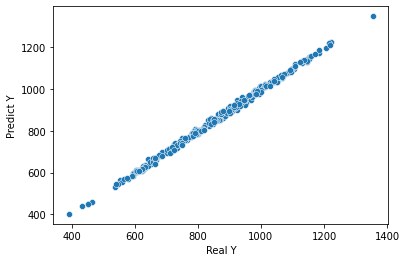

In [46]:
sbs.scatterplot(x='Real Y', y='Predict Y', data=predictDF)

Grafige gore veriler cok fazla saga sola dagilmamiz bu iyi bir sey. Model fena degil.

## Su ana kadar yaptigimiz islem;
### hatalarin karesinin alinmis hallerinin ortalamalarini aldik.
### Simdi de sklearn'den hatalarin gercek degerlerini(absolute) bulalim. Bu sayede gercek hata degerlerine ulasabiliriz.

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
mean_absolute_error(predictDF['Real Y'], predictDF['Predict Y']) # mutlak hata'yi bize verir!

7.101969014586882

In [52]:
df.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


## Mutlak hata 7.10... cikti yani veri setimizde ki ortalama satis fiyati 872 birim. Modelimize gore satis fiyati 7.10... birim civarinda artabilir, azalabilir.

### Simdi de yeni bir bisiklet ekleyelim. Bakalim Modelimiz nasil bir tahminde bulunacak?

In [58]:
yeniBisikletOzellikleri = [[1753, 1751]] # BisikletOzellik1, BisikletOzellik2

### YeniBisikletOzellikleri'ni transform(0-1) arasina cekelim;

In [59]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [60]:
yeniBisikletOzellikleri

array([[0.75368734, 0.62095915]])

### Ekledigimiz bisikletin fiyatini tahmin ettirelim;

In [61]:
model.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 13ms/step


array([[1082.3127]], dtype=float32)

## Modelimizi kaydetmek istersek;

In [64]:
from tensorflow.keras.models import load_model

In [65]:
model.save('bisiklet_modeli.h5')

## Modelimizi cagiralim;

In [66]:
cagirilanModel = load_model('bisiklet_modeli.h5')

In [67]:
cagirilanModel.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 42ms/step


array([[1082.3127]], dtype=float32)

### modelimizi cagirdik ve yukarida olusturdugumuz yeniBisikletOzellikleri'ne gore tahmin yapmasini sagladik